In [8]:
import time
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import os
import math

#import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split

from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.tree import DecisionTreeClassifier

import keras
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.
C:\Users\User\AppData\Local\conda\conda\envs\UserEnv\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\User\AppData\Local\conda\conda\envs\UserEnv\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\User\AppData\Local\conda\conda\envs\UserEnv\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1

### Import Data File

In [9]:
df = pd.read_csv("Accepted.csv")

### Split Data into X and y

In [18]:
X = df.loc[:, df.columns != 'grade']
y = df['grade']

### Examining the class distribution into percentages

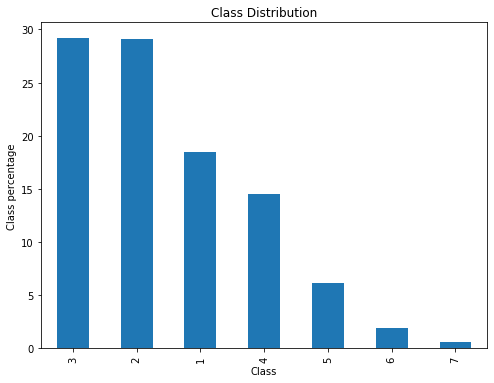

In [19]:
x_class = df.groupby('grade')['grade'].count()/len(df)*100
#df_community_area2 = df_community_area>0.5
#df_community_area3 = df_community_area[df_community_area2]
plt.rcParams["figure.figsize"]=(8,6)
x_class.sort_values(ascending=False, inplace = True)
x_class.plot(kind='bar', title = 'Class Distribution')
plt.xlabel('Class')
plt.ylabel('Class percentage')
plt.show()

#### Since we have a very large dataset, we are just taking the 10% of the full data
#### 10% of the full dataset will give us 160,000 rows

In [20]:
X1, X_test, y1, y_test = train_test_split(X,y,test_size=0.90, random_state=42, stratify=y)

In [21]:
df2 = pd.concat([X1, y1], axis = 1)
df2.shape
df2.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'emp_length',
       'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'pub_rec',
       'revol_bal', 'total_pymnt', 'total_rec_int', 'total_rec_late_fee',
       'recoveries', 'last_pymnt_amnt', 'collections_12_mths_ex_med',
       'acc_now_delinq', 'tot_coll_amt', 'total_rev_hi_lim',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy',
       'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mort_acc',
       'mths_since_recent_bc', 'mths_since_recent_inq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_bc_tl', 'num_il_tl',
       'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats',
       'num_tl_120dpd_2m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75',
       'pub_rec_bankruptcies', 'tax_liens', 'tot_hi_cred_lim',
       'total_il_high_credit_limit', 'home_ownership_MORTGAGE',
       'home_ownership_NONE', 'home_ownership_OTHER', 'home_ownership_OWN',
       'home_ownership_RENT', 'loan_status_Curren

### Counting different grades

In [22]:
x1_class = df2.groupby('grade')['grade'].count()
print(x1_class)

grade
1    29501
2    46468
3    46627
4    23110
5     9865
6     3105
7      911
Name: grade, dtype: int64


### Separating columns into features and target columns

In [23]:
X_new = df2.loc[:, df2.columns != 'grade']
y_new = df2['grade']

In [24]:
X_new.shape
y_new.shape

(159587,)

### Dividing dataset into 70% train and 30% test sets. 

In [25]:
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new,y_new,test_size=0.3, random_state=42, stratify=y_new)

In [26]:
print("X New Train Size : {}".format(X_train_new.shape))
print("y New Train Size : {}".format(y_train_new.shape))
print("X New Test Size : {}".format(X_test_new.shape))
print("y New Test Size : {}".format(y_test_new.shape))

X New Train Size : (111710, 55)
y New Train Size : (111710,)
X New Test Size : (47877, 55)
y New Test Size : (47877,)


### Random Forest Classifier 

### Selecting parameters to be varied

In [28]:
maxdepth_space = [10,12,14]
n_estimator_space = [20,40,60]
dict_params = {'criterion':['gini','entropy'], 
               'max_depth':maxdepth_space,  "n_estimators":n_estimator_space}

### Applying Random Forest (RF) classifier

In [29]:
model = RandomForestClassifier()
grid_cv = GridSearchCV(model, param_grid = dict_params, cv = 5)
grid_cv.fit(X_train_new,y_train_new)
test_acc = grid_cv.score(X_test_new, y_test_new)
y_pred = grid_cv.predict(X_test_new)
conf_mat = confusion_matrix(y_test_new, y_pred)
clr = classification_report(y_test_new, y_pred)
print(grid_cv.best_params_)

{'criterion': 'entropy', 'max_depth': 14, 'n_estimators': 40}


In [ ]:
print(test_acc)
print(conf_mat)
print(clr)

### Decision Tree

### Selecting parameters to be varied for DCT

In [27]:
criterion = ['entropy']
max_depth = [10,12,14,16,18,20]
testacc = []
dict_params = {'criterion':criterion, 'max_depth':max_depth}
dep = []

(47877, 55)

### Applying DCT classifier

In [28]:
model_dtc = DecisionTreeClassifier()
grid_cv_dtc = GridSearchCV(model_dtc, param_grid = dict_params, cv = 5)
grid_cv_dtc.fit(X_train_new,y_train_new)
test_acc_dtc = grid_cv_dtc.score(X_test_new, y_test_new)
y_pred_dtc = grid_cv_dtc.predict(X_test_new)
conf_mat_dtc = confusion_matrix(y_test_new, y_pred_dtc)
clr_dtc = classification_report(y_test_new, y_pred_dtc)
print(grid_cv_dtc.best_params_)

{'criterion': 'entropy', 'max_depth': 18}


### Plotting DCT classifier performance (accuracy) for different maximum depth size

In [409]:
for i in max_depth:
    dict_params = {'criterion':criterion, 'max_depth':max_depth}
    model_dtc = DecisionTreeClassifier()
    grid_cv_dtc = GridSearchCV(model_dtc, param_grid = dict_params, cv = 5)
    grid_cv_dtc.fit(X_train_new,y_train_new)
    test_acc_dtc = grid_cv_dtc.score(X_test_new, y_test_new)
    #y_pred_dtc = grid_cv_dtc.predict(X_test_new)
    testacc.append(test_acc_dtc)
    dep.append(i)    

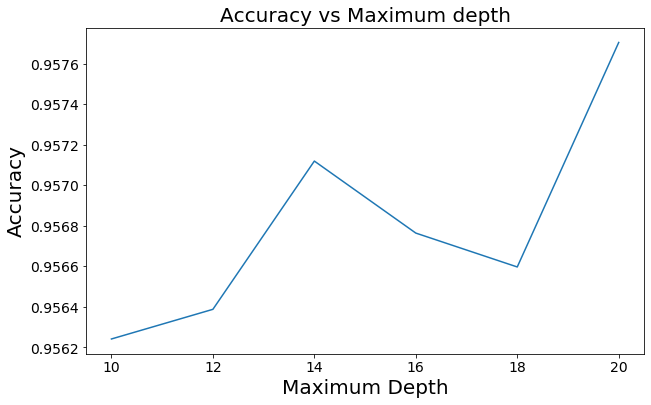

In [420]:
plt.plot(dep,testacc)
plt.rcParams["figure.figsize"]=(10,6)
plt.ylabel('Accuracy', fontsize=20)
plt.xlabel('Maximum Depth', fontsize=20)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.title("Accuracy vs Maximum depth", fontsize = 20)
plt.show()


In [204]:
print(test_acc_dtc)
print(conf_mat_dtc)
print(clr_dtc)

0.9492031664473547
[[ 8753    96     1     0     0     0     0]
 [   58 13507   376     0     0     0     0]
 [    1   228 13436   323     0     0     0]
 [    0     5   255  6176   497     0     0]
 [    0     0     2   385  2499    63    11]
 [    0     0     0     2    98   818    14]
 [    0     0     0     0     5    12   256]]
              precision    recall  f1-score   support

           1       0.99      0.99      0.99      8850
           2       0.98      0.97      0.97     13941
           3       0.95      0.96      0.96     13988
           4       0.90      0.89      0.89      6933
           5       0.81      0.84      0.82      2960
           6       0.92      0.88      0.90       932
           7       0.91      0.94      0.92       273

    accuracy                           0.95     47877
   macro avg       0.92      0.92      0.92     47877
weighted avg       0.95      0.95      0.95     47877



### KNN Classifier Before Scaling



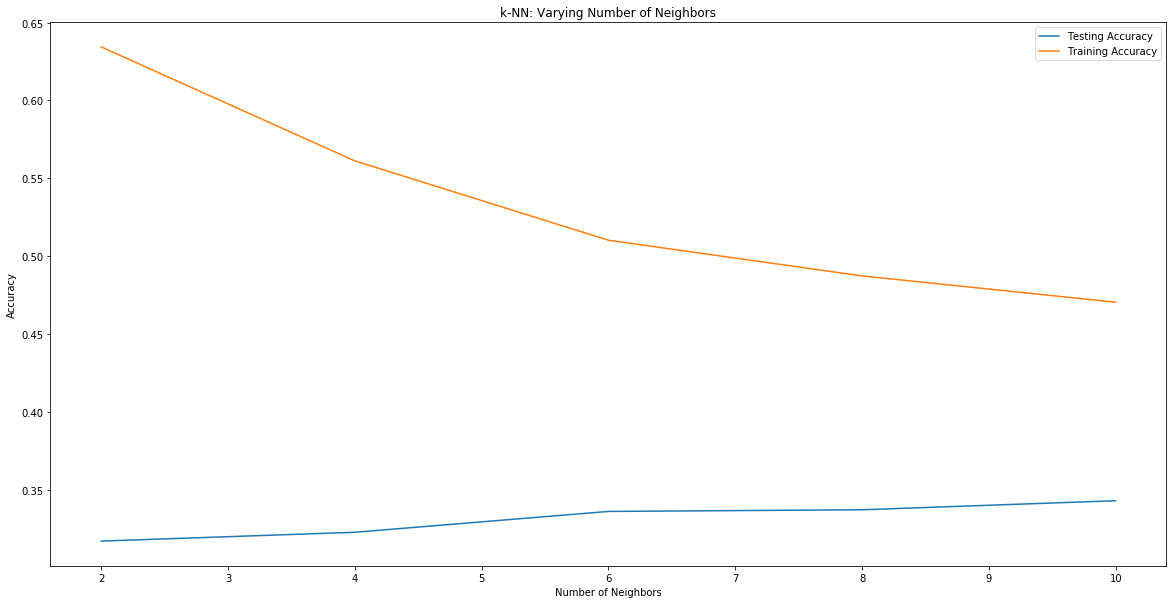

In [64]:
#params={"n_neighbors": np.arange(1,40)}
from sklearn.neighbors import KNeighborsClassifier
neighbors = [2,4,6,8,10]
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn_cv = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    #knn.fit(X_train_transformed,y_train)
    #knn=KNeighborsClassifier()
    #knn_cv=GridSearchCV(knn,params,cv=10)
    knn_cv.fit(X_train_new,y_train_new)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn_cv.score(X_train_new,y_train_new)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn_cv.score(X_test_new,y_test_new)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()


In [65]:
conf_mat = confusion_matrix(y_test_new, y_pred)
clr = classification_report(y_test_new, y_pred)

C:\Users\Bipasha\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [69]:
print(train_accuracy)

[0.63441053 0.56122997 0.51026766 0.48736013 0.47045922]


In [135]:
print(X_new.shape)
print(y_new.shape)

(159587, 69)
(159587,)


### Normalizing data using min_max Scaler

In [556]:

from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
scaler.fit(X_new)
X_new = pd.DataFrame(scaler.transform(X_new), index=X_new.index, columns=X_new.columns)
X_new.iloc[4:10]

,loan_amnt,term,int_rate,installment,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,pub_rec,...,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,loan_status_Current,loan_status_Default,loan_status_Fully Paid,loan_status_In Grace Period,loan_status_Late (16-30 days),loan_status_Late (31-120 days),pymnt_plan_y
922736,0.230769,0.0,0.221184,0.186441,0.222222,0.002419,0.293093,0.028571,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
63856,0.087179,0.0,0.312305,0.080041,0.000000,0.003990,0.227628,0.000000,0.000000,0.000000,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1467804,0.084615,0.0,0.000389,0.068434,0.111111,0.005247,0.283483,0.000000,0.166667,0.000000,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1298977,0.692308,1.0,0.584112,0.436562,0.111111,0.008703,0.355756,0.000000,0.166667,0.035714,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1491552,0.743590,0.0,0.079439,0.546588,0.333333,0.008180,0.533133,0.000000,0.000000,0.000000,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
219367,0.179487,0.0,0.242212,0.148618,1.000000,0.004828,0.124725,0.000000,0.166667,0.000000,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [557]:
print(X_new.shape)
print(y_new.shape)

(159587, 55)
(159587,)


### Splitting Normalized Data into train & Test set

In [558]:
Xs_train, Xs_test, ys_train, ys_test= train_test_split(X_new, y_new, test_size=0.3, random_state=42,stratify=y_new)

In [476]:
print(Xs_train.shape)
print(ys_train.shape)
print(Xs_test.shape)
print(ys_test.shape)

(111710, 55)
(111710,)
(47877, 55)
(47877,)


### Applying KNN algorithm

In [140]:
from sklearn.neighbors import KNeighborsClassifier
params={"n_neighbors": np.arange(1,10)}
model = KNeighborsClassifier()
grid_cv = GridSearchCV(model, param_grid = params, cv = 5)
grid_cv.fit(Xs_train,ys_train)
test_acc = grid_cv.score(Xs_test, ys_test)
y_pred = grid_cv.predict(Xs_test)
conf_mat = confusion_matrix(ys_test, y_pred)
clr = classification_report(ys_test, y_pred)
print(grid_cv.best_params_)

{'n_neighbors': 1}


In [141]:
print(test_acc)
print(conf_mat)
print(clr)

0.817741295402803
[[ 7755  1052    39     5     0]
 [  615 11970  1306    43     7]
 [   20  1460 11670   792    46]
 [    1    46  1606  4782   498]
 [    0     8    99  1083  2974]]
              precision    recall  f1-score   support

           1       0.92      0.88      0.90      8851
           2       0.82      0.86      0.84     13941
           3       0.79      0.83      0.81     13988
           4       0.71      0.69      0.70      6933
           5       0.84      0.71      0.77      4164

    accuracy                           0.82     47877
   macro avg       0.82      0.79      0.81     47877
weighted avg       0.82      0.82      0.82     47877



### Deep Neural Net (DNN)

In [688]:
dummy_columns = ["grade"]
y_train_new_NN = pd.get_dummies(ys_train, columns=dummy_columns)
y_test_new_NN = pd.get_dummies(ys_test, columns=dummy_columns)
#y_train_new_NN = pd.get_dummies(y_resampled, columns=dummy_columns)

In [689]:
print(y_train_new_NN.shape)
print(y_test_new_NN.shape)

(111710, 7)
(47877, 7)


### DNN Model

In [690]:
model = Sequential()
model.add(Dense(5, input_shape = (55,), activation = 'relu'))
model.add(Dense(5, activation = 'relu'))
#model.add(Dense(10, activation = 'relu'))
model.add(Dense(7, activation = 'softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_34 (Dense)             (None, 5)                 280       
_________________________________________________________________
dense_35 (Dense)             (None, 5)                 30        
_________________________________________________________________
dense_36 (Dense)             (None, 7)                 42        
Total params: 352
Trainable params: 352
Non-trainable params: 0
_________________________________________________________________


### Training the DNN

In [691]:
history = model.compile(loss='categorical_crossentropy', 
             optimizer = 'adam',
             metrics = ["accuracy"])
             #metrics = {'output_a': 'accuracy', 'output_b': 'f1'})
history = model.fit(Xs_train, y_train_new_NN, epochs=10, validation_split = 0.3, batch_size=32)


Train on 78197 samples, validate on 33513 samples
Epoch 1/10
78197/78197 [==============================] - 4s 55us/step - loss: 0.9423 - acc: 0.6505 - val_loss: 0.5113 - val_acc: 0.8126
Epoch 2/10
78197/78197 [==============================] - 4s 46us/step - loss: 0.4187 - acc: 0.8402 - val_loss: 0.3681 - val_acc: 0.8520
Epoch 3/10
78197/78197 [==============================] - 4s 45us/step - loss: 0.3529 - acc: 0.8547 - val_loss: 0.3387 - val_acc: 0.8586
Epoch 4/10
78197/78197 [==============================] - 3s 43us/step - loss: 0.3323 - acc: 0.8585 - val_loss: 0.3306 - val_acc: 0.8529
Epoch 5/10
78197/78197 [==============================] - 3s 44us/step - loss: 0.3227 - acc: 0.8617 - val_loss: 0.3216 - val_acc: 0.8646
Epoch 6/10
78197/78197 [==============================] - 3s 42us/step - loss: 0.3176 - acc: 0.8627 - val_loss: 0.3166 - val_acc: 0.8621
Epoch 7/10
78197/78197 [==============================] - 3s 44us/step - loss: 0.3142 - acc: 0.8644 - val_loss: 0.3127 - val_acc

### Plotting accuracy of DNN for different epochs

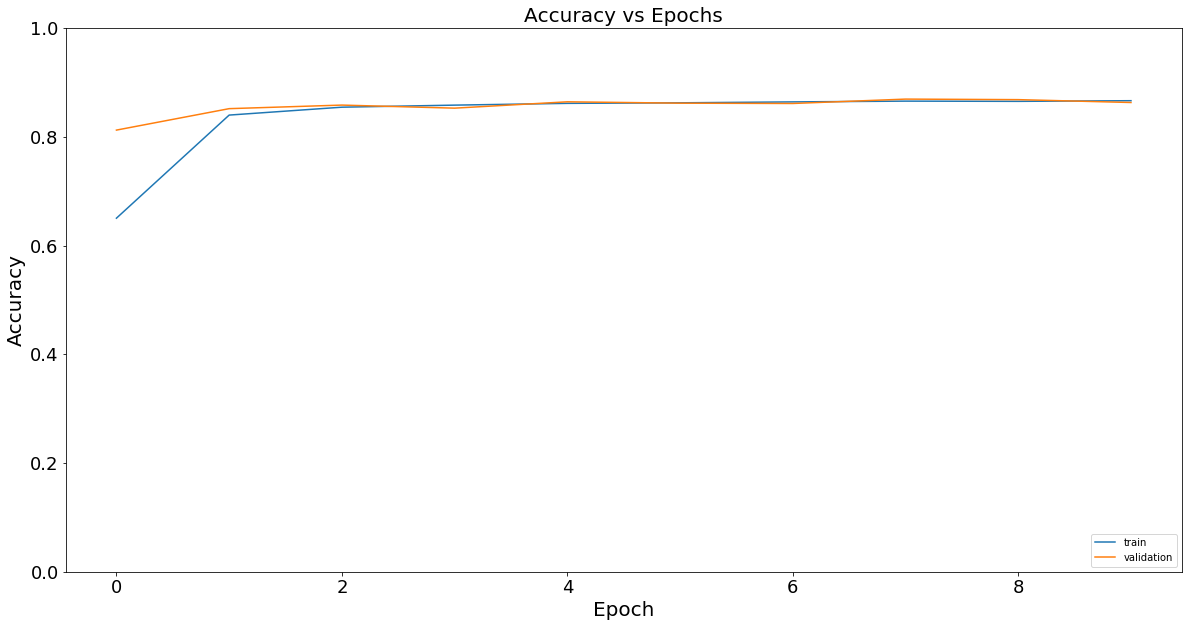

In [692]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Accuracy vs Epochs', fontsize = 20)
plt.ylabel('Accuracy', fontsize = 20)
plt.xlabel('Epoch', fontsize = 20)
plt.legend(['train', 'validation'], loc='lower right')
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.ylim(0,1)
plt.show()

### Plot loss for different epochs

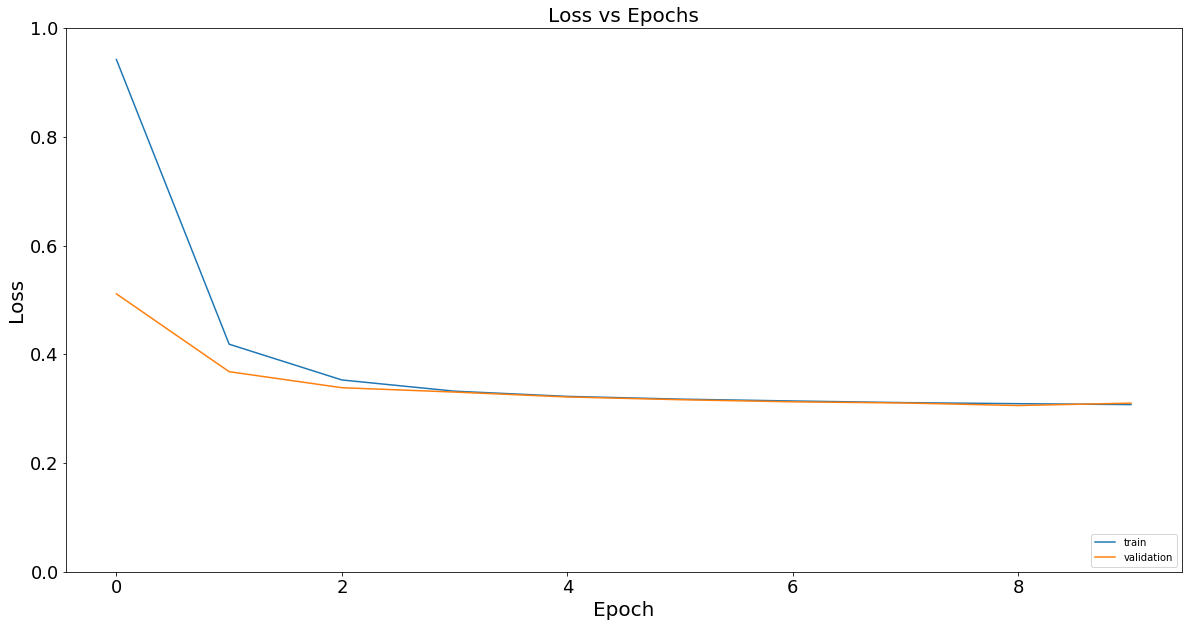

In [693]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs Epochs',fontsize = 20)
plt.ylabel('Loss', fontsize = 20)
plt.xlabel('Epoch', fontsize = 20)
plt.legend(['train', 'validation'], loc='lower right')
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.ylim(0,1)
plt.show()

### Evaluating the DNN model

In [694]:
model.evaluate(Xs_test, y_test_new_NN)

47877/47877 [==============================] - 1s 18us/step


[0.3099154768692988, 0.8648829291739166]

### Converting target data from dummy values (one hot) to numerical value

In [695]:
pr = model.predict(Xs_test)
print(pr.shape)
pr2 = np.argmax(pr, axis = 1)
print(pr2.shape)
classes2 = np.unique(ys_test)
print(classes2)
predicted_class2 = [classes2[p] for p in pr2]
#print(predicted_class2)



print(clr)
print(conf_mat)

(47877, 7)
(47877,)


### Finding the confusion matrix and classification report

In [696]:
conf_mat = confusion_matrix(ys_test, predicted_class2)
clr = classification_report(ys_test, predicted_class2)
print(clr)

[1 2 3 4 5 6 7]


### Logistic Regression (LR) from Scratch

### Applying oversamling to the train set using SMOTE

In [569]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(kind='borderline1')
X_resampled, y_resampled = sm.fit_sample(Xs_train, ys_train)

In [615]:
ydf = pd.DataFrame(y_resampled)
print(ydf)

        0
0       3
1       5
2       7
3       3
4       3
...    ..
228468  7
228469  7
228470  7
228471  7
228472  7

[228473 rows x 1 columns]


In [618]:
df = pd.DataFrame({'grd': y_resampled})
print(df)

        grd
0         3
1         5
2         7
3         3
4         3
...     ...
228468    7
228469    7
228470    7
228471    7
228472    7

[228473 rows x 1 columns]


### Classdistribution of the newly oversampled data

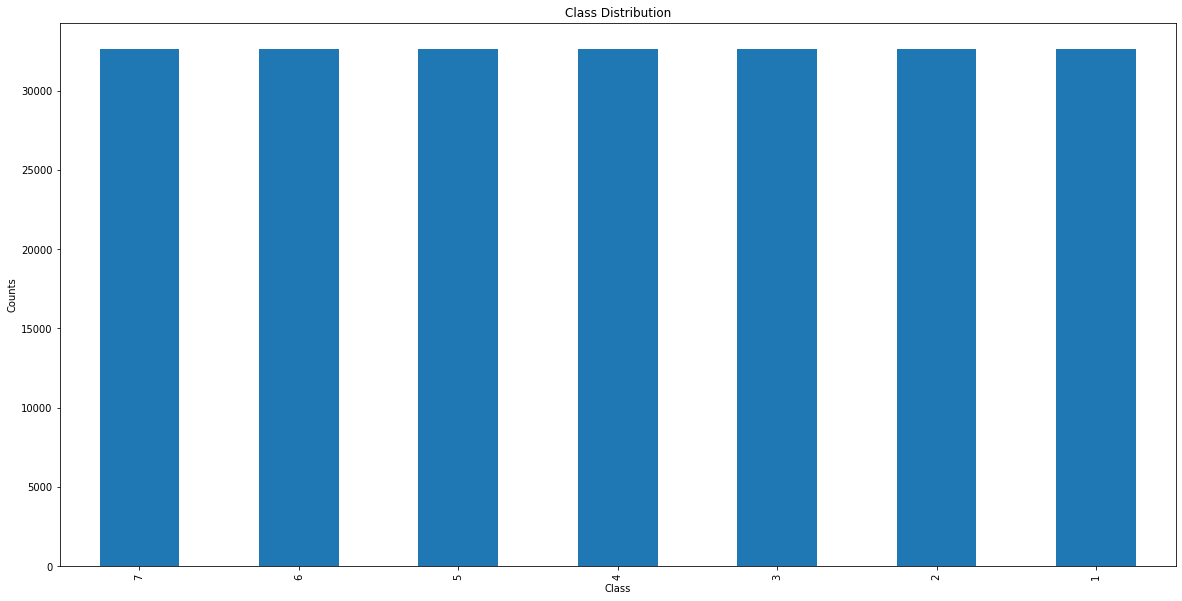

In [619]:
new_class_distribution = df.groupby('grd')['grd'].count()
#df_community_area2 = df_community_area>0.5
#df_community_area3 = df_community_area[df_community_area2]
plt.rcParams["figure.figsize"]=(20,10)
new_class_distribution.sort_values(ascending=False, inplace = True)
new_class_distribution.plot(kind='bar', title = 'Class Distribution')
plt.xlabel('Class')
plt.ylabel('Counts')
plt.show()

In [612]:
np.unique(y_resampled)

array([1, 2, 3, 4, 5, 6, 7], dtype=int64)

### We have broken down our logistic regression algorithm into 4 different functions

### Function 1: sigmoid

In [573]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

### Function 2: cost

In [575]:
def cost(theta, X, y):
    h = sigmoid(X @ theta)
    m = len(y)
    cost = 1 / m * np.sum(
        -y * np.log(h) - (1 - y) * np.log(1 - h)
    )
    grad = 1 / m * ((y - h) @ X)
    return cost, grad

### Function 3: fit

In [599]:
def fit(x, y, max_iter=30000, alpha=0.1):
    #x = x.to_numpy()
    #x = np.insert(x, 0, 1, axis=1)
    thetas = []
    classes = np.unique(y)
    costs = np.zeros(max_iter)

    for c in classes:
        # one vs. rest binary classification
        binary_y = np.where(y == c, 1, 0)
        
        theta = np.zeros(x.shape[1])
        for epoch in range(max_iter):
            costs[epoch], grad = cost(theta, x, binary_y)
            theta += alpha * grad
            
        thetas.append(theta)
    return thetas, classes, costs

### Training the logistic regression

In [ ]:
#Xs_train = np.insert(Xs_train, 0, 1, axis=1)
thetas, classes, costs = fit(X_resampled, y_resampled)

### Plotting loss vs number of iteration

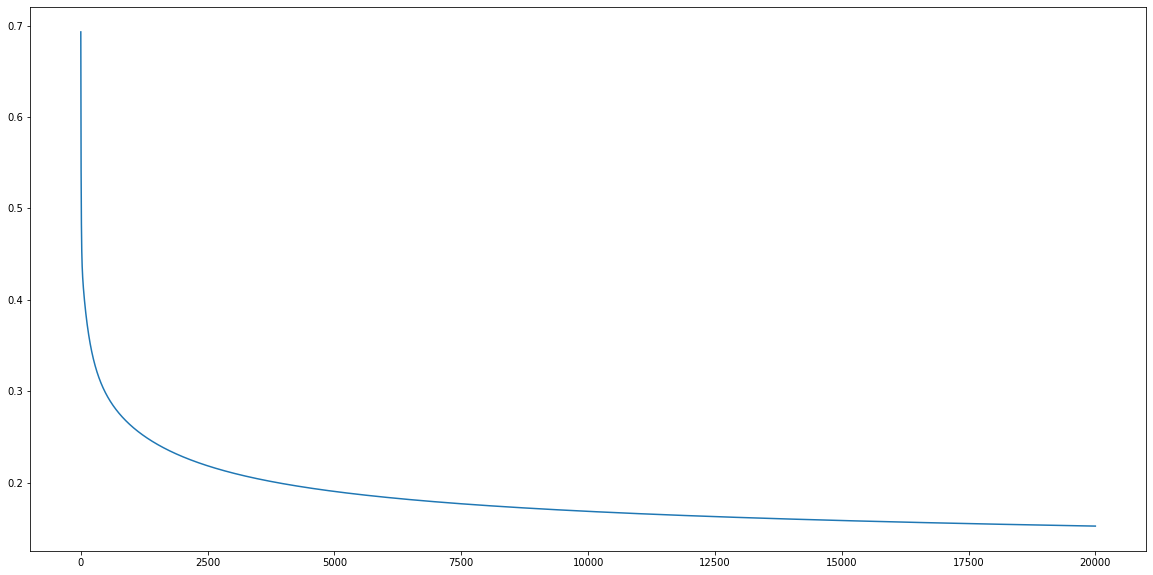

In [600]:
plot(costs)

(228473, 55)


### Function 4: predict

In [602]:
def predict(thetas, classes, X):
    X = X.to_numpy()
    #X = np.insert(X, 0, 1, axis=1)
    preds = []
    for x1 in X:
        sigm = []
        for theta in thetas:
            z = np.matmul(x1, theta)
            new_sigmoid = sigmoid(z)
            sigm.append(new_sigmoid)
        pred = np.argmax(sigm)
        preds.append(pred)
    predicted_class = [classes[p] for p in preds]
    return predicted_class

In [ ]:
predicted_class = predict(thetas, classes, Xs_test)

### Accuracy of logistic regression

In [ ]:
(predicted_class==ys_test).mean()

### Confusion matric for LR

In [ ]:
conf_mat = confusion_matrix(ys_test, predicted_class)
clr = classification_report(ys_test, predicted_class)
print(conf_mat)
print(clr)